In [1]:
# Important lib import
import pandas as pd
import numpy as np

In [3]:
# path to the file
path = "F:/Jitendra/IPBA/Training/Machine Learning/Decision Tree/HR_data.csv"

In [4]:
data = pd.read_csv(path)

In [5]:
data.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [6]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
# Sales
data.sales.nunique()

10

In [9]:
# Sales
data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
# salary
data.salary.nunique()

3

In [11]:
# salary
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [12]:
# salary
data.salary.value_counts()/ data.shape[0]

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [13]:
# target - left
# salary
data.left.value_counts()/ data.shape[0]

# Attrition rate is 23.8%

0    0.761917
1    0.238083
Name: left, dtype: float64

In [14]:
data_dummy = pd.get_dummies(data)

In [15]:

data_dummy.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
# Decision tree
# Import the class tree from sklearn
from sklearn import tree


In [17]:
# We have to create 2 data frames ... 1 will be for target variable  (y)
# the second will be your feature set .. X (all the independednt var)

# Create y array
y = data_dummy['left'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [18]:
# X feature set array
X = data_dummy.drop("left", axis =1).values
X

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [19]:
# Steps to create a model

#1. y and X split of data
#2. Create and initialize an object of the tree class (mod)... DecisionTreeClassifier object of the tree class
#3.Train and test split of data..
#4. Train or model the data on train data = fitting
#5. Validate or score the model on the test data.. check the generalizability or robustness of the model that you created

In [29]:
mod = tree.DecisionTreeClassifier(max_depth=4)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline # to get plots in the same notebook

UsageError: unrecognized arguments: # to get plots in the same notebook


In [30]:
mod.fit(X,y)

DecisionTreeClassifier(max_depth=4)

In [31]:
data_dummy.drop("left", axis =1).columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

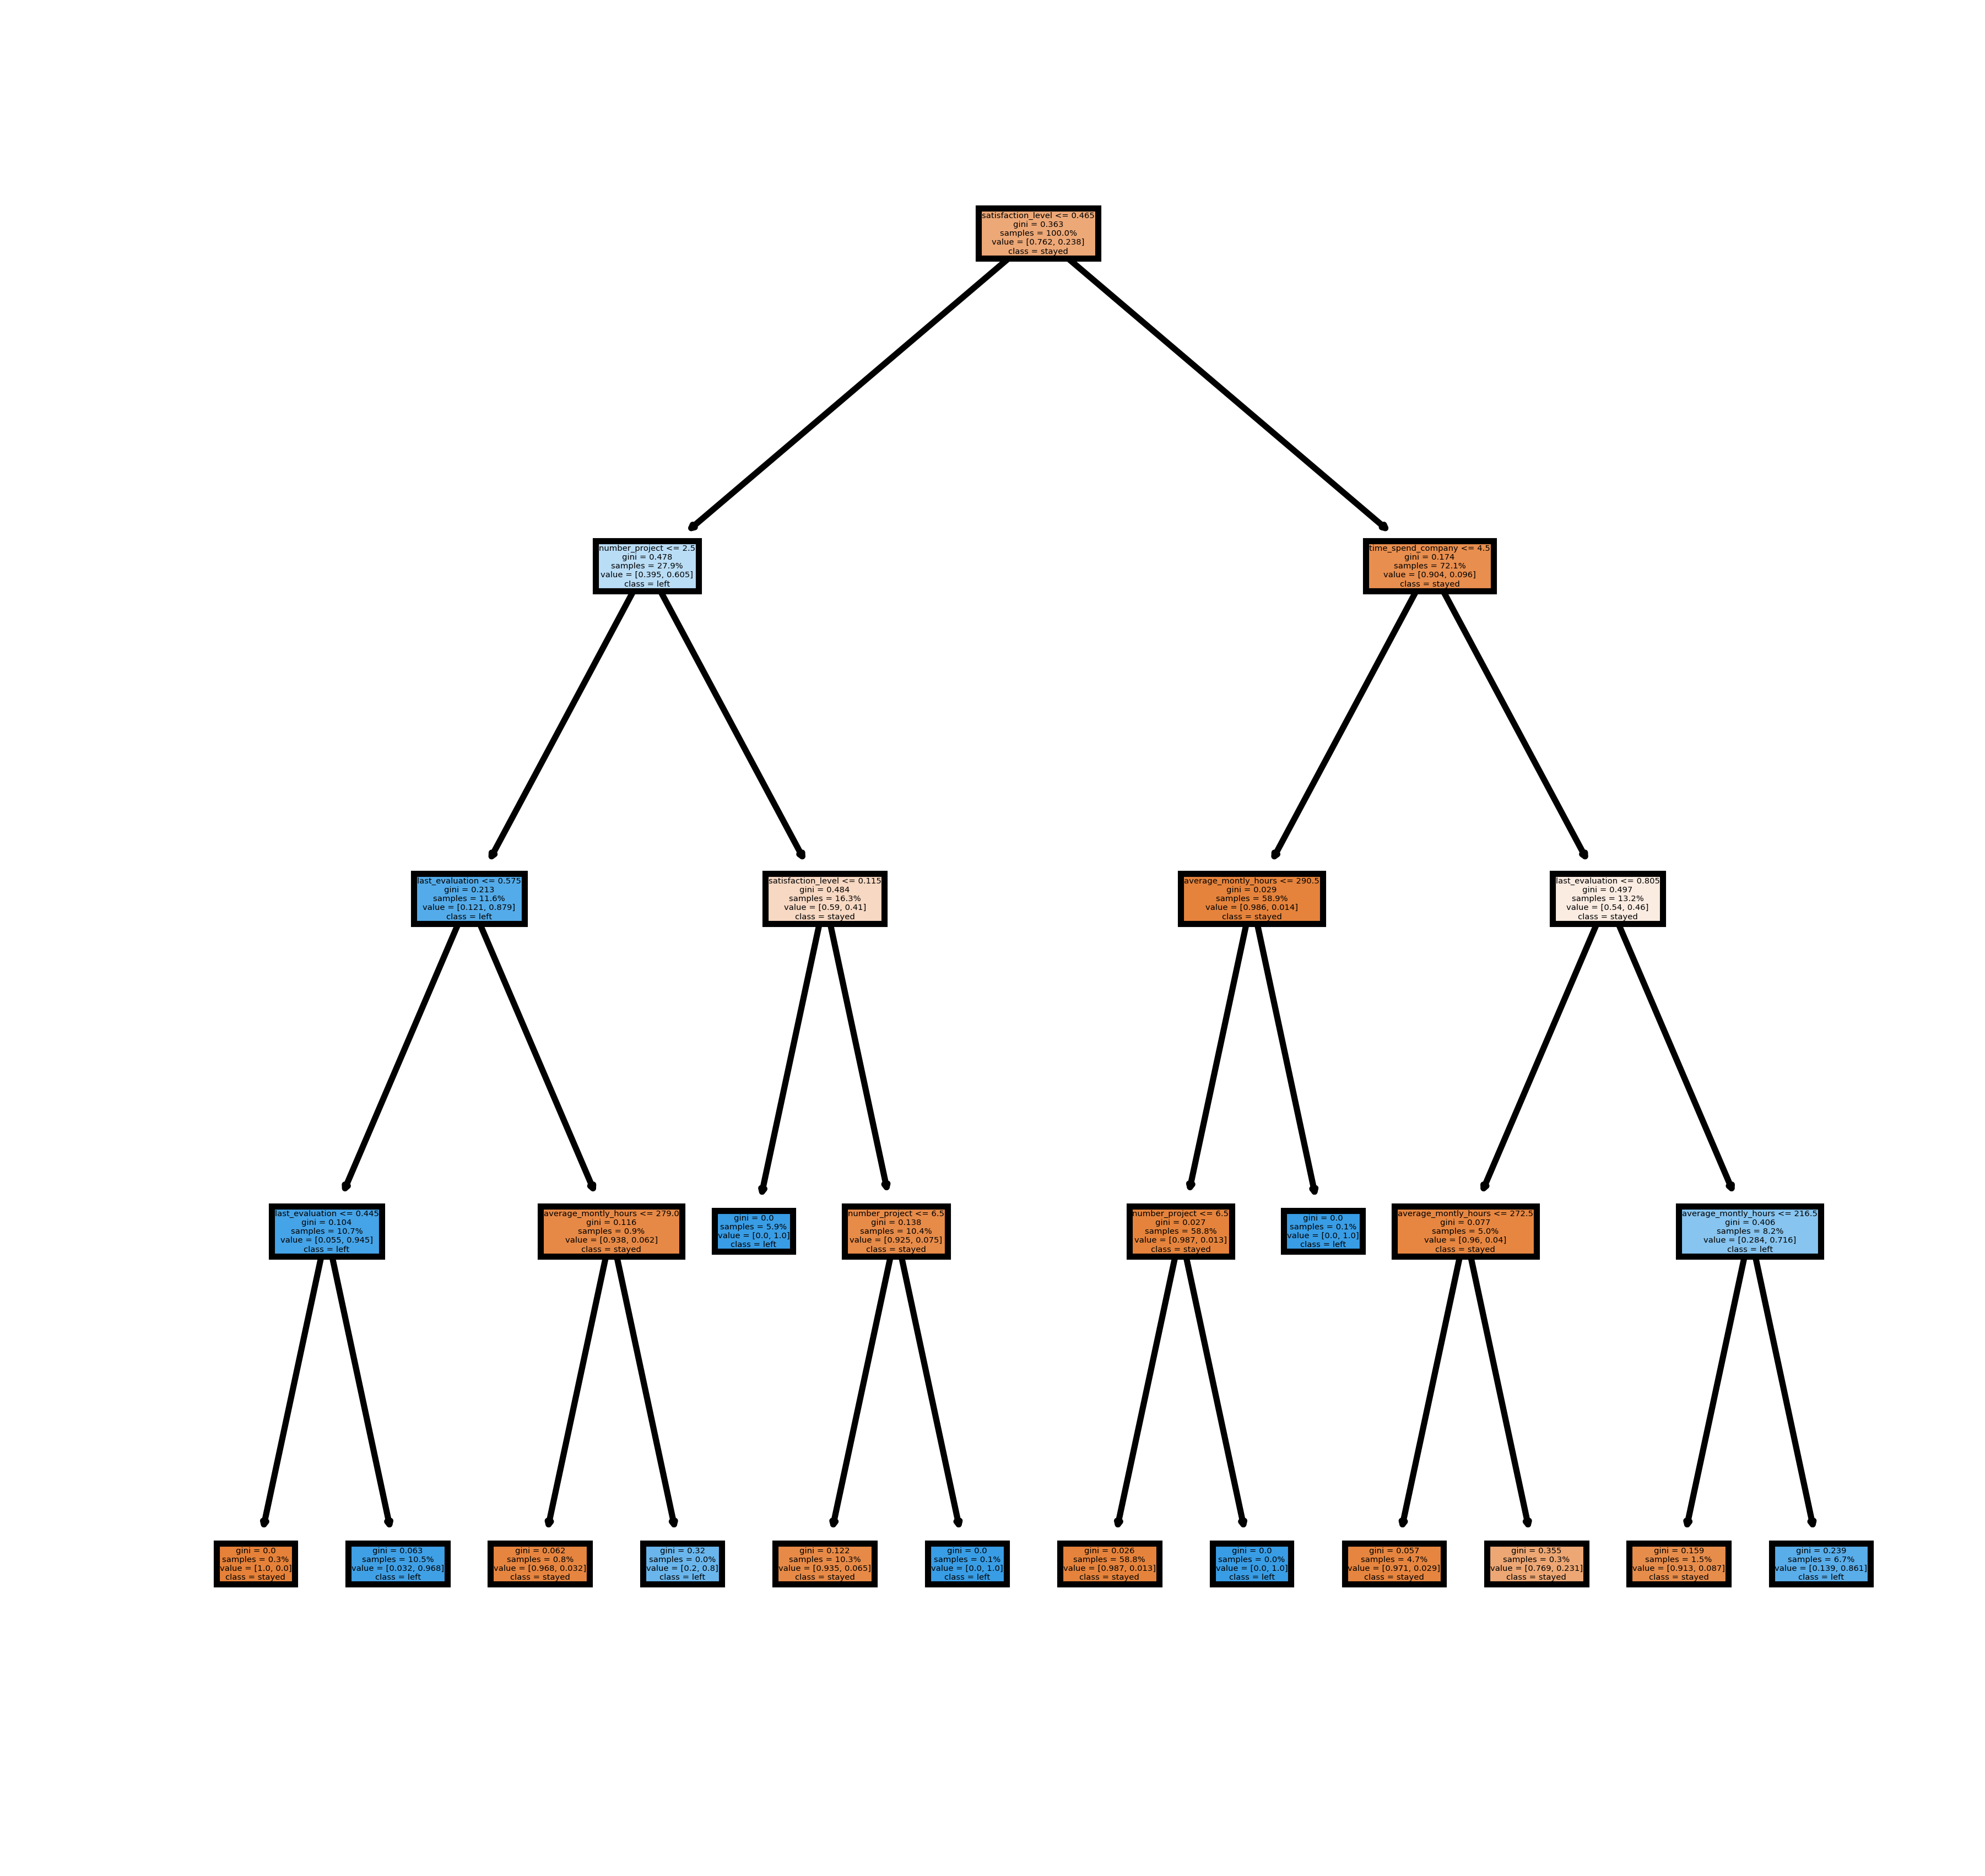

In [32]:
plt.figure(figsize = (5,5), dpi = 800)

feature_names = data_dummy.drop("left", axis =1).columns

tree.plot_tree(mod,feature_names = feature_names.tolist(), \
              class_names = ["stayed", "left"], proportion = True, \
               filled = True)

plt.show

In [28]:
data_dummy.drop("left", axis =1).columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [30]:
feature_names = data_dummy.drop("left", axis =1).columns
feature_names.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'sales_IT',
 'sales_RandD',
 'sales_accounting',
 'sales_hr',
 'sales_management',
 'sales_marketing',
 'sales_product_mng',
 'sales_sales',
 'sales_support',
 'sales_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [33]:
# Display the rules of all the nodes
plt.figure(figsize = None, dpi = 800)
tree_rules = tree.export_text(mod,  feature_names = feature_names.tolist())
print(tree_rules)

|--- satisfaction_level <= 0.47
|   |--- number_project <= 2.50
|   |   |--- last_evaluation <= 0.57
|   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |--- class: 0
|   |   |   |--- last_evaluation >  0.44
|   |   |   |   |--- class: 1
|   |   |--- last_evaluation >  0.57
|   |   |   |--- average_montly_hours <= 279.00
|   |   |   |   |--- class: 0
|   |   |   |--- average_montly_hours >  279.00
|   |   |   |   |--- class: 1
|   |--- number_project >  2.50
|   |   |--- satisfaction_level <= 0.11
|   |   |   |--- class: 1
|   |   |--- satisfaction_level >  0.11
|   |   |   |--- number_project <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- number_project >  6.50
|   |   |   |   |--- class: 1
|--- satisfaction_level >  0.47
|   |--- time_spend_company <= 4.50
|   |   |--- average_montly_hours <= 290.50
|   |   |   |--- number_project <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- number_project >  6.50
|   |   |   |   |--- class: 1
|   |   |--- average_montly_hours 

<Figure size 4800x3200 with 0 Axes>

In [ ]:
# Train test split of the data
# X_train, X_test (these are feature sets of train and test data)
# y_train, y_test (these are target var in train and test data)

In [34]:
# Import train test class
from sklearn.model_selection import train_test_split

In [35]:
# # 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 4)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(11999, 20)
(3000, 20)
(11999,)
(3000,)


In [37]:
mod = tree.DecisionTreeClassifier(max_depth=3)

In [38]:
mod.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

<function matplotlib.pyplot.show(*args, **kw)>

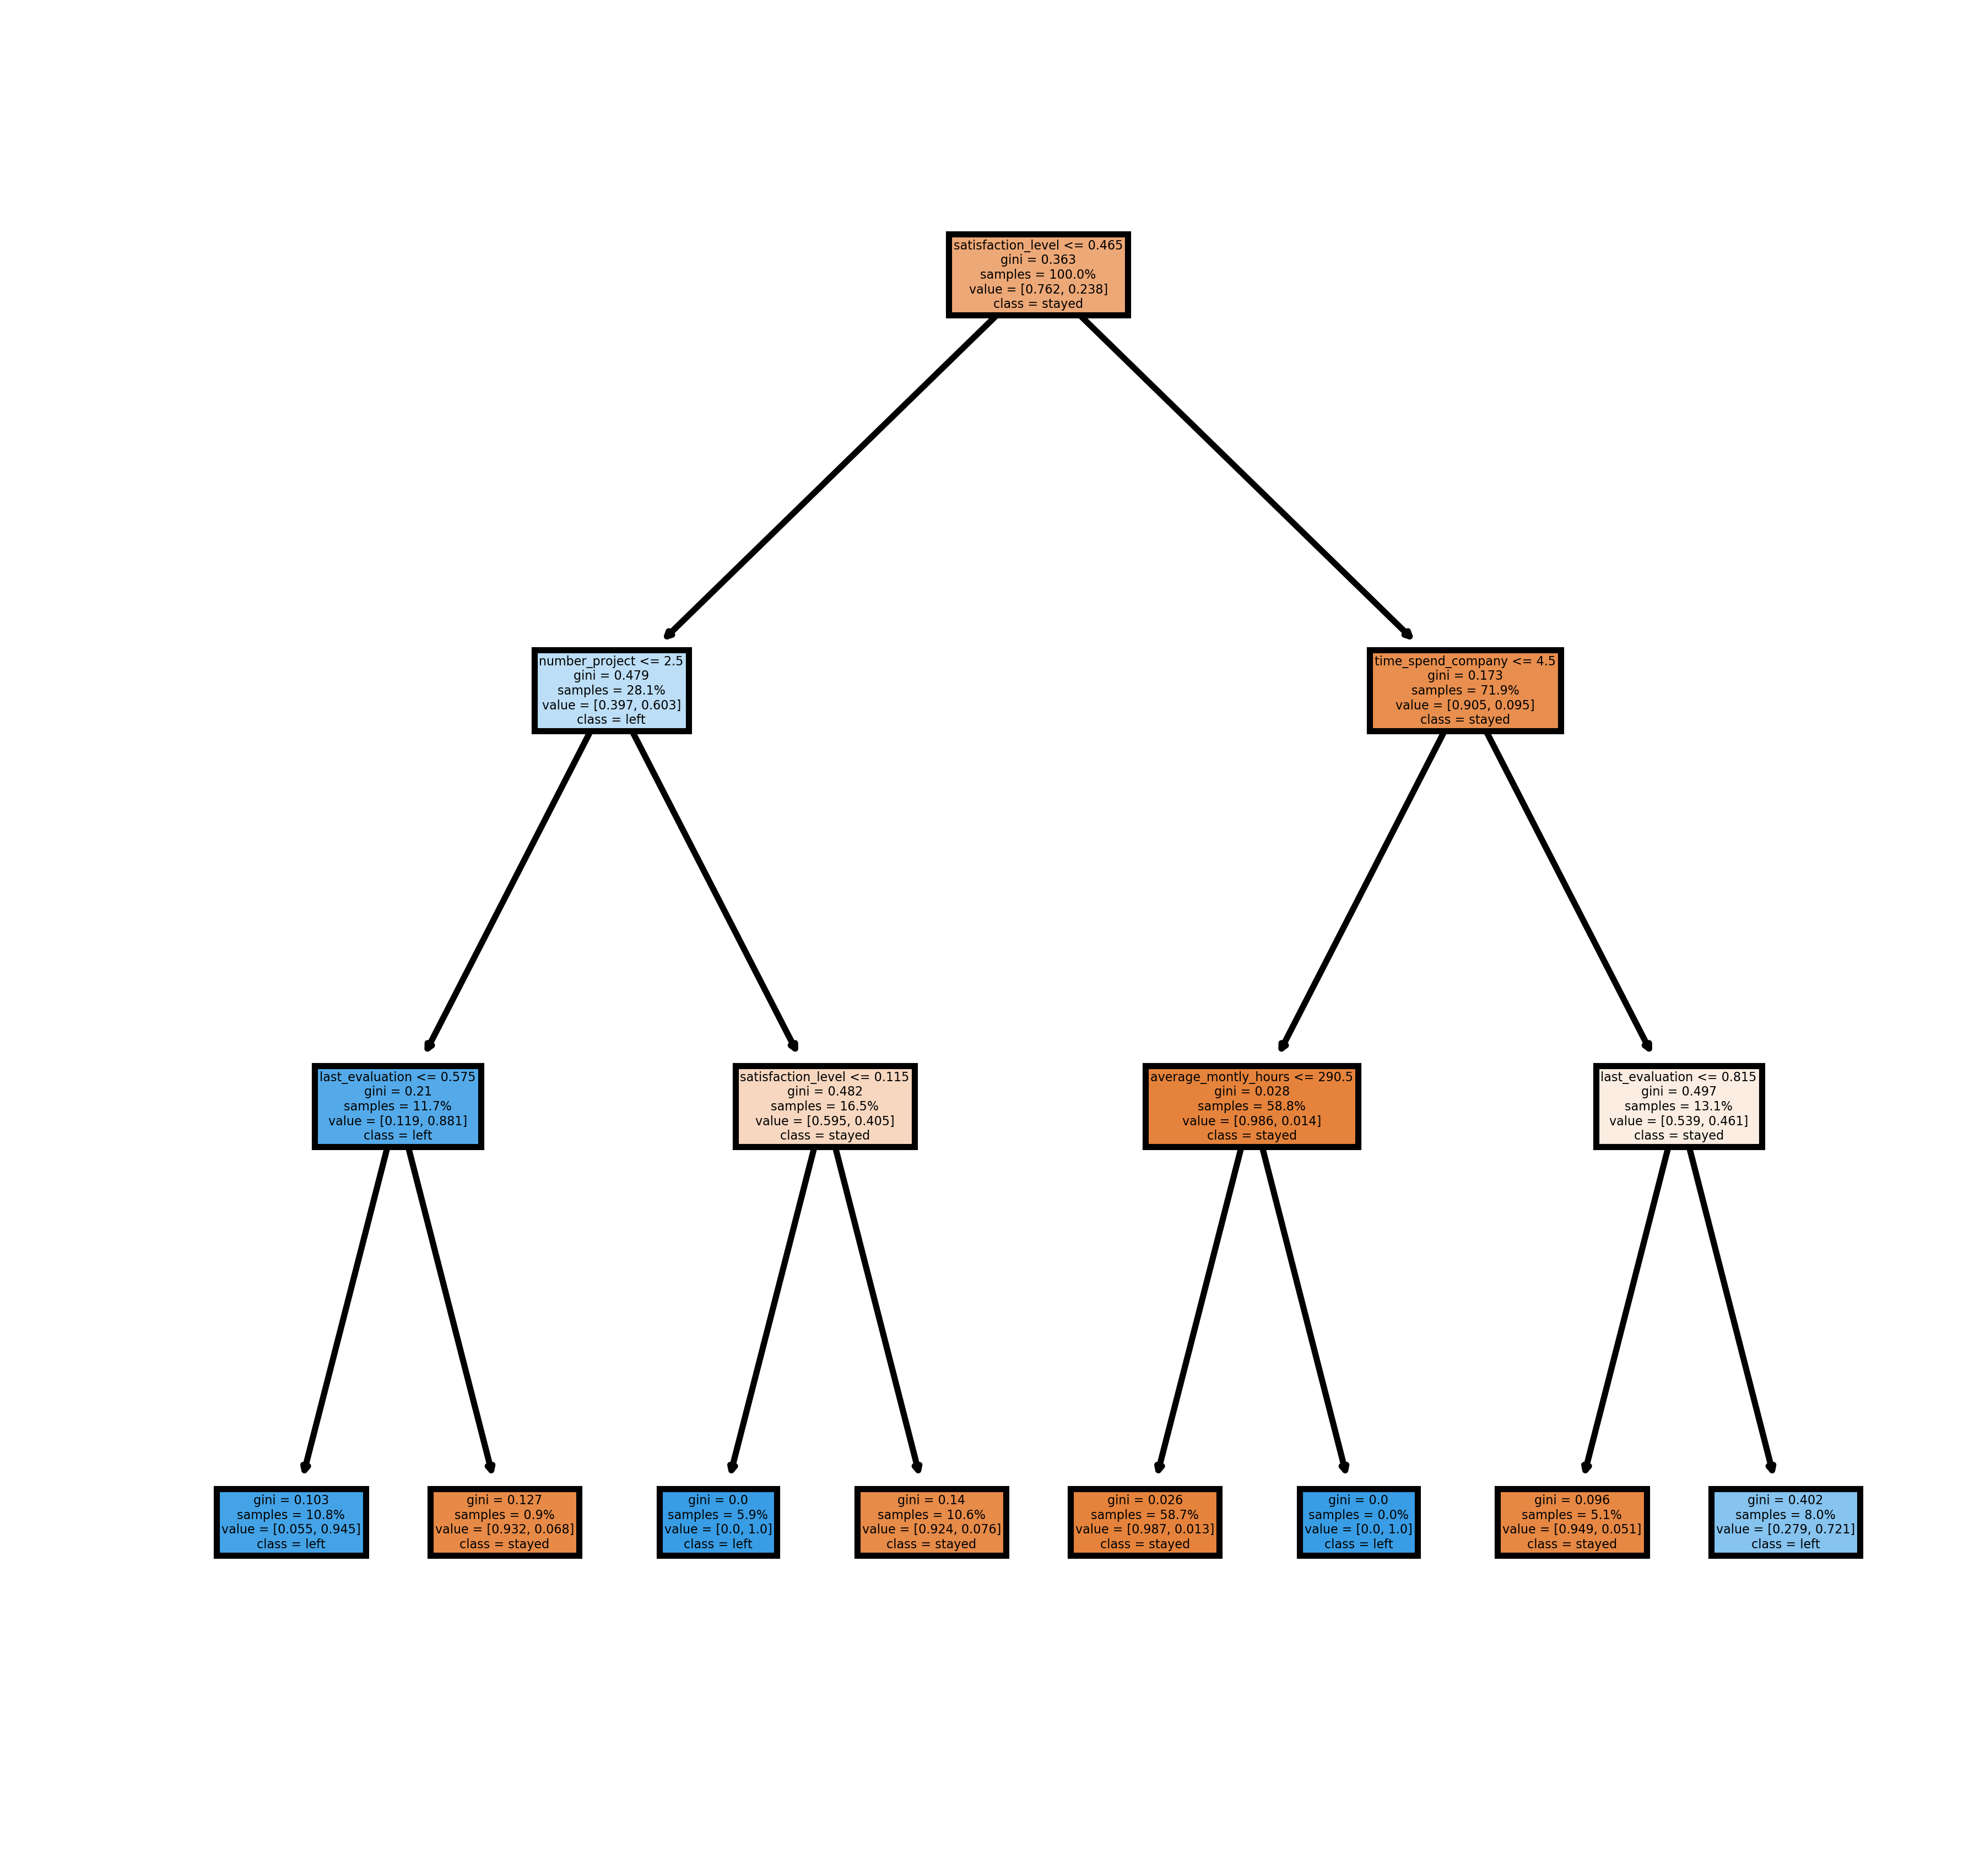

In [39]:
plt.figure(figsize = (5,5), dpi = 800)

feature_names = data_dummy.drop("left", axis =1).columns

tree.plot_tree(mod,feature_names = feature_names.tolist(), \
              class_names = ["stayed", "left"], proportion = True, \
               filled = True)

plt.show

In [43]:
# Evaluate how my model is performing
# Acuuracy
# Confuion Matrix
# ROC
# AUC

In [45]:
# Predict 1 and 0
predicted_lables = mod.predict(X_test)

In [46]:
predicted_lables

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [47]:
# Actual lables
y_test

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [48]:
y_test == predicted_lables

array([ True,  True,  True, ...,  True,  True,  True])

In [50]:
(y_test == predicted_lables).mean()

0.9536666666666667

In [53]:
# Accuracy on test data
mod.score(X_test, y_test)

0.9536666666666667

In [54]:
# Accuracy on train  data
mod.score(X_train, y_train)

0.9527460621718477

In [55]:
# Is there a problem with accuracy as a metric o judge model performance

In [56]:
# Confusion matrix
from sklearn import metrics

In [57]:
# Create conf matrix
metrics.confusion_matrix(y_test, predicted_lables)

array([[2202,   85],
       [  54,  659]], dtype=int64)

In [70]:
 probs = mod.predict_proba(X_test)[:,1]

In [72]:
(probs>0.5).astype("int")

array([0, 1, 0, ..., 0, 1, 1])

In [73]:
# Confusion matrix with new thresholds
metrics.confusion_matrix(y_test, (probs>0.2).astype("int"))

array([[2202,   85],
       [  54,  659]], dtype=int64)

In [74]:
# Confusion matrix with new thresholds
metrics.confusion_matrix(y_test, (probs>0.8).astype("int"))

array([[2269,   18],
       [ 234,  479]], dtype=int64)

In [ ]:
# Concept of ROC and AUC which are not dpependednt on the threshold cutoff - ]

In [75]:
metrics.roc_auc_score(y_test, probs)

0.9659456983216926

In [76]:
# ROC curve

In [78]:
fpr, tpr, thr = metrics.roc_curve(y_test,probs)

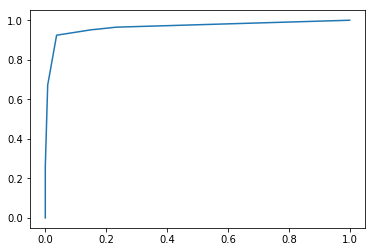

In [79]:
plt.plot(fpr,tpr,"-")